**Dataset Source:** https://archive.ics.uci.edu/dataset/45/heart+disease

Column Descriptions:

`id: `(Unique id for each patient)

`age:` (Age of the patient in years)

`origin:` (place of study)

`sex: `(Male/Female)

`cp:` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

`trestbps:` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

`chol:` (serum cholesterol in mg/dl)

`fbs:` (if fasting blood sugar > 120 mg/dl)

`restecg:` (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]

`thalach:` maximum heart rate achieved

`exang:` exercise-induced angina (True/ False)

`oldpeak:` ST depression induced by exercise relative to rest

`slope:` the slope of the peak exercise ST segment

`ca:` number of major vessels (0-3) colored by fluoroscopy

`thal:` [normal; fixed defect; reversible defect]

`num:` the predicted (target) attribute or label

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# **EDA - Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
data.shape

(920, 16)

In [ ]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Age**

In [ ]:
data['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

***Histogram***

<Axes: xlabel='age', ylabel='Count'>

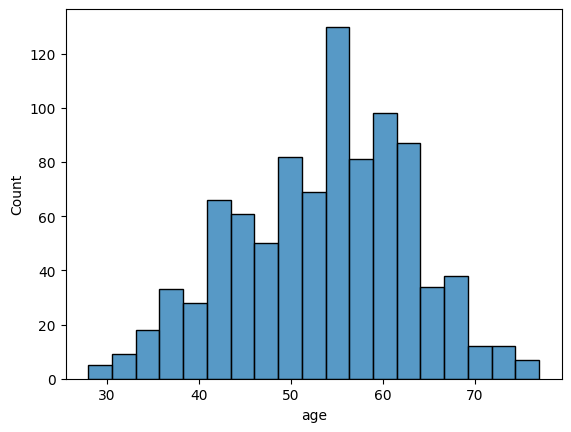

In [ ]:
sns.histplot(data['age'])

***Sex***

In [ ]:
#gender
data['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [ ]:
data.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: age, Length: 91, dtype: int64

In [ ]:
fig = px.histogram(data, x = 'age', color = 'sex')
fig.show()

# **Dataset**

In [ ]:
# dataset
data.groupby('num')['dataset'].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: dataset, dtype: int64

In [ ]:
fig = px.bar(data, x='dataset', color='sex')
fig.show()

# **Chest Pain -cp**

<Axes: xlabel='cp', ylabel='count'>

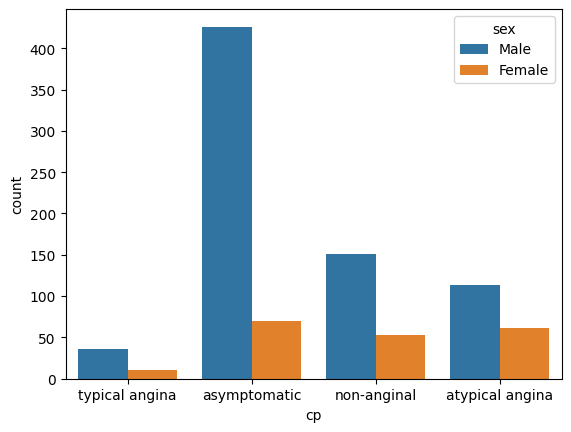

In [ ]:
sns.countplot(data, x ='cp', hue = 'sex')

<Axes: xlabel='cp', ylabel='count'>

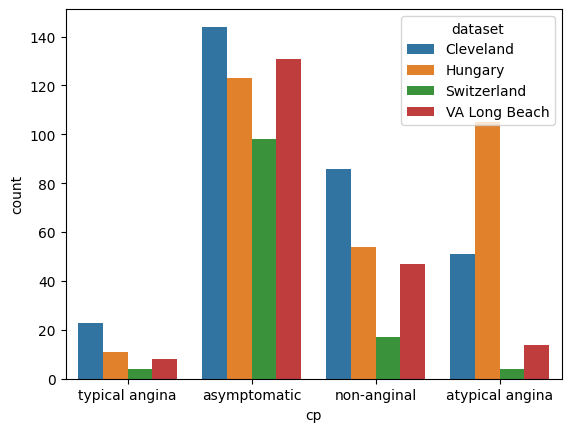

In [ ]:
sns.countplot(data, x = 'cp', hue= 'dataset')

In [ ]:
# group- dataset & cp
data.groupby('cp')['dataset'].value_counts()

cp               dataset      
asymptomatic     Cleveland        144
                 VA Long Beach    131
                 Hungary          123
                 Switzerland       98
atypical angina  Hungary          105
                 Cleveland         51
                 VA Long Beach     14
                 Switzerland        4
non-anginal      Cleveland         86
                 Hungary           54
                 VA Long Beach     47
                 Switzerland       17
typical angina   Cleveland         23
                 Hungary           11
                 VA Long Beach      8
                 Switzerland        4
Name: dataset, dtype: int64

## Testing Blood Pressure -trestbps





In [ ]:
data['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

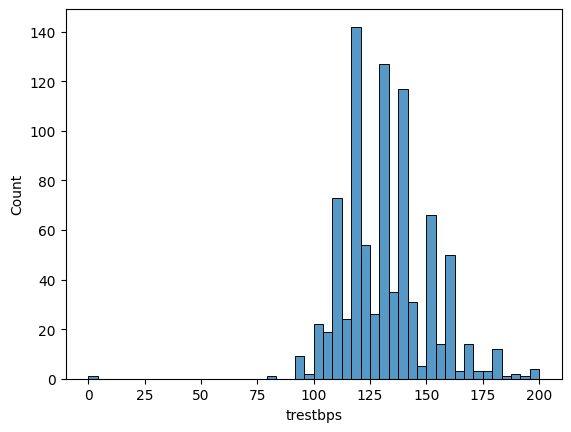

In [ ]:
sns.histplot(data['trestbps'])

In [ ]:
data = data[data['trestbps'] != 0]

In [ ]:
data['trestbps'].describe()

count    860.000000
mean     132.286047
std       18.536175
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

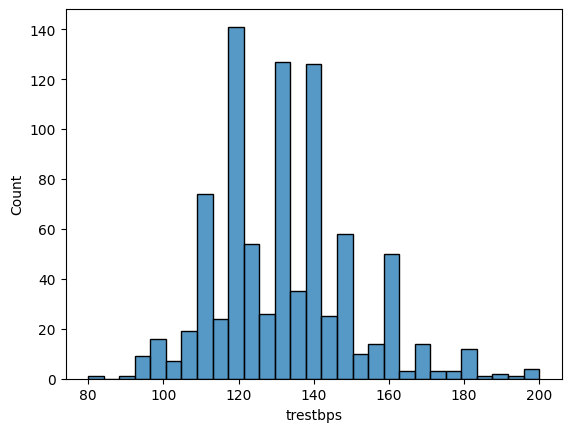

In [ ]:
sns.histplot(data['trestbps'])

# **restecg _resting ecg**

In [ ]:
data['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

**Correlaton Analysis**

In [ ]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data_corr = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

data[data_corr]

,age,trestbps,chol,thalch,oldpeak
0,63,145.0,233.0,150.0,2.3
1,67,160.0,286.0,108.0,1.5
2,67,120.0,229.0,129.0,2.6
3,37,130.0,250.0,187.0,3.5
4,41,130.0,204.0,172.0,1.4
...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0
916,62,NaN,139.0,NaN,NaN
917,55,122.0,223.0,100.0,0.0
918,58,NaN,385.0,NaN,NaN


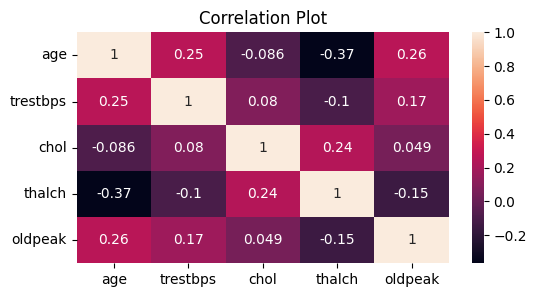

In [ ]:
plt.figure(figsize= (6, 3))
sns.heatmap(data[data_corr].corr(), annot= True)
plt.title("Correlation Plot")
plt.show()

# **Handiling Missing Values**

In [ ]:
data = pd.read_csv('/content/heart_disease_uci.csv')
data.shape

(920, 16)

In [ ]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
# for numeric columns: we use median values to fill (impute) missing values

numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak' ]
numeric_imputer = SimpleImputer(strategy= 'median')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

In [ ]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

In [ ]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
num           0
dtype: int64

In [ ]:
data.drop(['ca'], axis =1 , inplace=True)

In [ ]:
data.shape

(920, 15)

In [ ]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64